In [339]:
import numpy as np
import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf


In [340]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [341]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, input_shape=(28 * 28,), activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_62 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_63 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_64 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_65 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_66 (Dense)             (None, 10)                260       
Total params: 88,285
Trainable params: 88,285
Non-trainable params: 0
_________________________________________________________________


In [342]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 1.2765 - acc: 0.5944 - val_loss: 0.4845 - val_acc: 0.8486
Epoch 2/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3783 - acc: 0.8905 - val_loss: 0.3003 - val_acc: 0.9146
Epoch 3/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.2795 - acc: 0.9191 - val_loss: 0.2383 - val_acc: 0.9324
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2218 - acc: 0.9357 - val_loss: 0.1996 - val_acc: 0.9415
Epoch 5/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.1871 - acc: 0.9454 - val_loss: 0.1696 - val_acc: 0.9498
Epoch 6/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.1618 - acc: 0.9526 - val_loss: 0.1561 - val_acc: 0.9527
Epoch 7/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1437 - acc: 0.9575 - val_loss: 0.1407 - val_acc

In [345]:
x_pred_test = x_test[:20]
y_pred_label = y_test[:20]

preds = model.predict(x_pred_test)

pred = []
for x in range(0,len(preds)):
    maxIndex = np.argmax(preds[x])
    pred.append(maxIndex)

pred_label = []
for x in range(0,len(y_pred_label)):
    maxIndex = np.argmax(y_pred_label[x])
    pred_label.append(maxIndex)

arr_pred = np.array(pred)
arr_pred_label = np.array(pred_label)
print(arr_pred)
print(arr_pred_label)
print("\nAccurancy: ",np.sum(arr_pred == arr_pred_label) / len(arr_pred))

[7 2 1 0 4 1 4 9 8 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]

Accurancy:  0.95


The above cell is to use the test data set to verify the caluclation of accurancy.

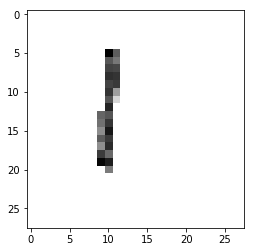

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 2 3 2]
[1 7 3 7 2 6 1 8 9 0 1 7 7 9 8 3 5 4 4 9]

Accurancy:  0.1


In [344]:
#https://stackoverflow.com/a/12201744/3628117
#The img.convert('L') doesnot produce array with shape()
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

imgs = np.zeros(shape=(20,784))
for x in range(1,21):
    img = keras.preprocessing.image.load_img(path='./handwrite/{0}.png'.format(x), target_size=(28,28)) #Set target size with tuple
    gray = rgb2gray(np.array(img)) #Conver the rgb file to greyscale
    arr = np.array(gray)
    arr = arr.astype('float32') / 255.0
    arr = arr.reshape(-1, 28*28)
    imgs[x-1] = arr

plt.imshow(imgs[0].reshape(28,28), cmap = plt.get_cmap('gray'))
plt.show()
   
labels = np.array([1,7,3,7,2,6,1,8,9,0,1,7,7,9,8,3,5,4,4,9])

preds = model.predict(imgs)

pred = []
for x in range(0,len(preds)):
    maxIndex = np.argmax(preds[x])
    pred.append(maxIndex)

arr_pred = np.array(pred)
arr_pred_label = np.array(labels)
print(arr_pred)
print(arr_pred_label)
print("\nAccurancy: ",np.sum(arr_pred == arr_pred_label) / len(arr_pred))

In [ ]:
labels = np.array([1,7,3,7,2,6,1,8,9,0,1,7,7,9,8,3,5,4,4,9])
labels = np.array([1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0])

plt.imshow(img, cmap=plt.cm.binary)
plt.show()